# Greedy Algorithms - Dijkstra's Algorithm for the Shortest Path Problem

For COT5405 at UCF, by Raphael Guzman

## Preface & Requirements

To preface, the purpose of this notebook is to provide a custom implementation and visualization of Dijkstra's shortest path algorithm for weighted graphs. This notebook will go into depth about the functionality of Dijkstra's algorithm, how I have implemented it, and what it looks like in action. 

To run the algorithm over user generated custom graphs a few python packages & libraries **MUST** be installed. These packages are listed below: 

### Required Packages for User-Testing

- [IPython](https://ipython.org/): An interactive python shell used cohesively with Jupyter Notebooks.
- [Matplotlib](https://matplotlib.org/): A python plotting library for creating static, animated, and interactive visualizations in python.
- [Networkx](https://networkx.github.io/): A python package for the representation & manipulation of complex networks.
- [Pandas](https://pandas.pydata.org): An open source data analysis and manipulation tool package for python.

## How to use

### To open this notebook:

This notebook requires [Python 3](https://www.python.org/) & [Jupyter Notebook](https://jupyter.org/) to be installed on your machine. With those installed, a notebook server can be started from the command line with:

$jupyter notebook

From there you will be directed to a web-based dashboard with a filesystem that points to the directory the command was called in. The notebook can then be opened and viewed from there, starting a python 3, ipython kernel once it's openend.

### To Run Test Data With this Notebook:

Before you begin make sure that you have the **required** packages installed, as the testing scripts provided at the end of the notebook require them. Once the notebook has been opened on a jupyter server you can run each cell containing python code in it by navigating to the cell and pressing shift + enter. This will load the script into the ipython 3 kernel and run it sequentially. 

However do note that due to the structure of this notebook, the cells containing python scripts are intended to be run sequentially so that they may work appropriately. *If for some reason a code cell is not working properly*, please clear all the outputs of each cell and run them all sequentially to reload their contents back into the kernel. 

### Importing & Using Test Data:

Near the end of this notebook a section of separated cells allow for user-created input data to be used and visualized. Within the custom Graph Classes there is a "readadjlist" function that creates a graph from a adjacency list graph representation text file. 

To utilize these function and import user data into the codebase please format your file in the format shown below and place it into the same directory as this notebook. Once you're ready to import the file, near the bottom of the notebook there are two code cells labeled "User-Input Directional Graphs" and "User-Input Non-Directional Graphs". Each of these code cells are prefilled with the following piece of code: `testGraph.readadjlist('example.txt')` in it. To run these code cells with your data, replace the `example.txt` string with the name of your data text file in the code cell corresponding to the type of your graph, and then hit shift + enter. This will run the function and begin running Dijkstra's Algorithm over the graph provided.

An example text file with the formatting necessary for importation is also provided and imported into this notebook for your convenience.

### Example Text File:

To import user-created input data please create a text file listing all of the edges in the graph with the following format:

source_vertex destination_vertex weight

To import the non-directional graph used in Example 1.) the following format can be used for example:

0 1 1

0 2 3

1 2 1

1 3 5

2 3 3

3 0 6

3 1 5

4

To add singular vertices without any edges simply omit a destination_vertex and a weight. Two example graphs with their respective text files can be found in the same directory as this notebook title 'example.txt' and 'exampleDi.txt'. 

## Dijkstra's Algorithm

In short, Dijkstra's algorithm is a greedy solution to find the shortest paths between nodes in a graph. Published in 1959, Dijkstra's original algorithm only found the shortest path between two nodes, however this notebook will implement a variant that finds the shortest paths from a source node to all others in a graph. A quick walkthrough of how the algorithm behaves can be seen below:

*PREREQUESITE:* Edges have non-negative weights

### Steps
1. Create a set of unvisited nodes and initially mark all nodes as unvisited.
2. Assign every node a cost / distance value that represents the cost or distance from the source node to that node.
3. Initally set the distance value for every node to infinity.
4. Mark the source node as visited, assign it a distance value of 0, and set it as the current node.
5. For the current node update the distance values of each of its neighbors to the minimum of its current value and its value through the current node.
6. Mark the current node as visited and remove it from the unvisited set.
7. If all connected nodes in the graph have been visited, stop, the algorithm has finished. Otherwise move on to step 8. 
8. Select the unvisited node with the smallest distance value, set it as the new current node and go back to step 5.

In terms of run-time complexity, the algorithm is dependent on three distinct items: the number of edges in the graph $|E|$, the number of nodes in the graph $|V|$, and the data structure used to represent the graph as well as the vertices & their distances to the source vertex, $H$. In many cases the complexity can be simplified as $|E|$ is $(O|V|^2)$ for any graph, though in certain situations other upper bounds on $|E|$ may be present.

In the case that $H$ is implemented as a simple array or linked list and the graph is stored with an adjacency matrix representation, the running time of Dijkstra's is observed to be $O(|E| + |V|^2) = O(|V|^2)$

Through the use of a self-balancing minimum value binary heap for $H$, along with an adjacency list representation of the graph, the run-time complexity of the algorithm can be further improved to $O((|E|+|V|)log|V|)$. Utilizing a minheap as the data structure for $H$ allows for quicker accesses & updates to vertex data within the algorithm and as a result improves performance. The benefits of using an adjacency list for graph representation can be seen most distinctly when comparing sparse & dense graphs, wherein the run time for sparse & dense graphs is the same in adjacency matrices, but significantly reduced in adjacency lists.

This run-time complexity can also be further reduced to $O(|E| + |V|log|V|)$ if a Fibonacci Heap is implemented for $H$.

## Custom Implementation

To demonstrate how the algorithm performs on both directional & non-directional weighted graphs alike, I implemented Dijkstra's algorithm using a few custom classes. The classes seen in the codebase below, work together to recreate Dijkstra's algorithm with a run-time complexity of $O((|E| + |V|)log|V|)$. More specifically, I utilized a minheap data structure as a priority queue to achieve O(1) element updates & removal & an adjacency list representation. The specifics of the custom classes present in the code base are as follows:

- MinHeap data structure class to act as a priority queue with O(1) element updates and extraction.
- Vertex Class to hold vertex data including ID, distance/cost, and shortest path.
- Two Directional & Non-Directional Graph Classes to represent distinct graphs with adjacency lists.

## Codebase - MinHeap Class as Priority Queue

In [1]:
%matplotlib inline
from collections import defaultdict
from IPython.display import display
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import sys

class Heap():
  '''
  Object Class to represent a Min-Heap Data Structure.
  Supports two basic functions: 

  deleteMin() - Best Case: O(1) / Worse Case: O(log n)
  insert() - Best Case: O(1) / Worst Case: O(log n)

  This simple Min Heap is to be used in conjunction Dijkstra's Algorithm as a priority queue
  to support O((|E| + |V|)log |V|) behavior.
  '''
  def __init__(self):
    self.array = []

  def isEmpty(self):
    return True if len(self.array) <= 0 else False

  def swap(self, i, j):
    temp = self.array[i]
    self.array[i] = self.array[j]
    self.array[j] = temp

  def getParent(self, child):
    return 0 if child == 0 else ( child - 1 ) // 2

  def percolateUp(self, child):
    parent = self.getParent(child)

    while self.array[child] < self.array[parent]:
      self.swap(child, parent)
      child = parent
      parent = self.getParent(child)

  def insert(self, data):
    self.array.append(data)
    self.percolateUp(len(self.array)-1)

  def smallestChild(self, parent):
    length = len(self.array)
    leftchild = (2 * parent + 1) if (2 * parent + 1) < length else parent
    rightchild = (2 * parent + 2) if (2 * parent + 2) < length else parent

    retbool = self.array[leftchild] < self.array[rightchild]
    return leftchild if retbool else rightchild

  def percolateDown(self, parent):
    child = self.smallestChild(parent)

    while (self.array[parent] > self.array[child]):
      self.swap(parent, child)
      parent = child
      child = self.smallestChild(parent)

  def deleteMin(self):
    if self.isEmpty():
      print("This heap is empty, no root to delete.")
      return

    elif len(self.array) - 1 == 0:
      return self.array.pop()
    
    retval = self.array[0]
    self.array[0] = self.array[len(self.array) - 1]
    self.array.pop()
    self.percolateDown(0)
    
    return retval

  def heapify(self):
    start = self.getParent(len(self.array) - 1)

    for index in range(start, -1, -1):
      self.percolateDown(index)

## Codebase - Vertex Class to Hold Cost, Distance, and Path Data

In [2]:
class Vertex():
  '''
  Object Class to represent Vertices in a Graph.
  These vertices contain 3 primary fields:

  ID: int - An number that identifies the vertex
  dist: int - The distance to this vertex relative to a source vertex at
              any given step within Dijkstra's Algorithm.

  path: list - The shortest cost path to reach this vertex relative to a
               source vertex at any given step within
               Dijkstra's Algorithm.
  '''
  def __init__(self, ID, dist=0, path=[]):
    self.ID = ID
    self.dist = dist
    self.path = path

  def __lt__(self, rhs):
    return self.dist < rhs.dist
  
  def __gt__(self, rhs):
    return self.dist > rhs.dist

  def __str__(self):
    pathString = ""
    for i, v in enumerate(self.path):
      if i == len(self.path) - 1:
        pathString += f"{v}"
      else:
        pathString += f"{v} -> "

    return f"Shortest path to vertex {self.ID} is {pathString} with a total cost of {self.dist}"


## Codebase - Non-Directional Graph Class with Dijkstra's Implementation

In [3]:
def colorCell(x, row=0):
  df = pd.DataFrame('', x.index, x.columns)
  df.iloc[row, 1] = 'color: red'
  return df

class Graph():
  '''
  Object Class to represent Weighted Non-Directional Graphs.
  The graphs are stored and represented by an adjacency list format.

  These graphs contain 2 primary fields:
  order: int - The number of vertices in this graph
  adjlist: defaultdict(list) - The adjacency list
  '''
  def __init__(self, order=0):
    self.order = order
    self.adjlist = defaultdict(list)
    for vertex in range(order):
      self.adjlist[vertex] = []

  def addEdge(self, v1, v2, weight):
    vertices = self.adjlist.keys()
    if not v1 in vertices:
      self.order += 1
    if not v2 in vertices:
      self.order += 1
    self.adjlist[v1].append((v2, weight))
    self.adjlist[v2].append((v1, weight))

  def addNode(self, v):
    if not v in self.adjlist.keys():
      self.adjlist[v] = []
      self.order += 1

  @staticmethod
  def readadjlist(filename):
    g = Graph()
    with open(filename) as file:
      for line in file:
        tokens = line.split()
        if len(tokens) > 1:
          g.addEdge(int(tokens[0]), int(tokens[1]), int(tokens[2]))
        elif len(tokens) == 1:
          g.addNode(int(tokens[0]))
    return g

  def dijkstra(self, start):
    dist = [float('inf')] * self.order
    visited = [False] * self.order
    numVisited = 0

    dist[start] = 0

    heap = Heap()
    heap.insert(Vertex(start, 0, [start]))

    while not heap.isEmpty() and numVisited < self.order:
      vertex = heap.deleteMin()
      if visited[vertex.ID]:
        continue

      print(vertex)
      visited[vertex.ID] = True
      numVisited += 1

      for edge in self.adjlist[vertex.ID]:
        if edge[1] + vertex.dist < dist[edge[0]]:
          dist[edge[0]] = edge[1] + vertex.dist
          newPath = vertex.path.copy()
          newPath.append(edge[0])
          newVertex = Vertex(edge[0], dist[edge[0]], newPath)
          heap.insert(newVertex)

  def printDijkstra(self, start):
    plotGraph = self.toNX()
    try:
      pos = nx.planar_layout(plotGraph)
    except nx.NetworkXException:
      pos = nx.spring_layout(plotGraph)

    edge_labels = nx.get_edge_attributes(plotGraph, 'weight')
    options = {'node_size':700}
    node_colors = ['green'] * len(plotGraph.nodes())
    edge_colors = ['black'] * len(plotGraph.edges())

    dist = [float('inf')] * self.order
    visited = [False] * self.order
    numVisited = 0

    dist[start] = 0

    heap = Heap()
    heap.insert(Vertex(start, 0, [start]))
    vertices = []

    print(f"Begin Dijkstra's Algorithm over the following graph with {self.order} vertices at source vertex: {start}")
    nx.draw_networkx_edge_labels(plotGraph, pos, edge_labels=edge_labels)
    nx.draw(plotGraph, pos, with_labels=True, node_color=node_colors, **options)
    plt.show()
    print("\nInitial table of vertices and their distances from the source: ")
    df = pd.DataFrame({'vertex':range(self.order), 'distance/cost':dist})
    display(df.style.hide_index())
    while not heap.isEmpty() and numVisited < self.order:
      vertex = heap.deleteMin()
      if visited[vertex.ID]:
        continue

      vertices.append(vertex)
      print('{:-^50}'.format('-'))
      print(f"\nVisiting vertex: {vertex.ID}")
      visited[vertex.ID] = True
      numVisited += 1
      updateCheck = False
      node_index = list(plotGraph.nodes()).index(vertex.ID)
      node_colors[node_index] = 'yellow'

      if len(vertex.path) > 1:
        for i in range(len(vertex.path[:-1])):
          index = list(plotGraph.edges()).index((vertex.path[i], vertex.path[i+1]))
          edge_colors[index] = 'blue'

      for edge in self.adjlist[vertex.ID]:
        if edge[1] + vertex.dist < dist[edge[0]]:
          updateCheck = True
          index = list(plotGraph.edges()).index((vertex.ID, edge[0]))
          edge_colors[index] = 'red'
          nx.draw_networkx_edge_labels(plotGraph, pos, edge_labels=edge_labels)
          nx.draw(plotGraph, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, **options)
          plt.show()
          print("Smaller distance found, table updated!")
          edge_colors[index] = 'black'

          dist[edge[0]] = edge[1] + vertex.dist
          newPath = vertex.path.copy()
          newPath.append(edge[0])
          newVertex = Vertex(edge[0], dist[edge[0]], newPath)
          heap.insert(newVertex)

          df.update({'distance/cost':dist})
          display(df.style.apply(colorCell, row=edge[0], axis=None).hide_index())
          print("\n")
      if not updateCheck:
        print("No smaller distances found.")
      node_colors[node_index] = 'green'

    print('{:-^50}'.format('-'))
    print(f"\nShortest paths to each vertex from vertex: {start}")
    edge_colors = ['black'] * len(plotGraph.edges())
    for vertex in vertices:
      for i in range(len(vertex.path[:-1])):
        index = list(plotGraph.edges()).index((vertex.path[i], vertex.path[i+1]))
        edge_colors[index] = 'blue'
      index = list(plotGraph.nodes()).index(vertex.ID)
      node_colors[index] = 'yellow'
      nx.draw_networkx_edge_labels(plotGraph, pos, edge_labels=edge_labels)
      nx.draw(plotGraph, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, **options)
      plt.show()
      node_colors[index] = 'green'
      edge_colors = ['black'] * len(plotGraph.edges())
      print(vertex)
      print('{:-^50}'.format('-'))
      print("\n")

  def toNX(self):
    g = nx.Graph()
    for node, edgelist in self.adjlist.items():
      g.add_node(node)
      for edge in edgelist:
        g.add_edge(node, edge[0], weight=edge[1])

    return g


## Codebase - Directional Graph Class

In [4]:
class GraphDi():
  '''
  Object Class to represent Weighted Directional Graphs.
  The graphs are stored and represented by an adjacency list format.

  These graphs contain 2 primary fields:
  order: int - The number of vertices in this graph
  adjlist: defaultdict(list) - The adjacency list
  '''
  def __init__(self, order=0):
    self.order = order
    self.adjlist = defaultdict(list)
    for vertex in range(order):
      self.adjlist[vertex] = []

  def addEdge(self, v1, v2, weight):
    vertices = self.adjlist.keys()
    if not v1 in vertices:
      self.order += 1
    if not v2 in vertices:
      self.order += 1
      self.adjlist[v2] = []

    self.adjlist[v1].append((v2, weight))

  def addNode(self, v):
    if not v in self.adjlist.keys():
      self.order += 1
      self.adjlist[v] = []

  @staticmethod
  def readadjlist(filename):
    g = GraphDi()
    with open(filename) as file:
      for line in file:
        tokens = line.split()
        if len(tokens) > 1:
          g.addEdge(int(tokens[0]), int(tokens[1]), int(tokens[2]))
        elif len(tokens) == 1:
          g.addNode(int(tokens[0]))
    return g

  def dijkstra(self, start):
    dist = [float('inf')] * self.order
    visited = [False] * self.order
    numVisited = 0

    dist[start] = 0

    heap = Heap()
    heap.insert(Vertex(start, 0, [start]))

    while not heap.isEmpty() and numVisited < self.order:
      vertex = heap.deleteMin()
      if visited[vertex.ID]:
        continue

      print(vertex)
      visited[vertex.ID] = True
      numVisited += 1

      for edge in self.adjlist[vertex.ID]:
        if edge[1] + vertex.dist < dist[edge[0]]:
          dist[edge[0]] = edge[1] + vertex.dist
          newPath = vertex.path.copy()
          newPath.append(edge[0])
          newVertex = Vertex(edge[0], dist[edge[0]], newPath)
          heap.insert(newVertex)

  def printDijkstra(self, start):
    plotGraph = self.toNX()
    try:
      pos = nx.planar_layout(plotGraph)
    except nx.NetworkXException:
      pos = nx.spring_layout(plotGraph)

    edge_labels = nx.get_edge_attributes(plotGraph, 'weight')
    options = {'node_size':700}
    node_colors = ['green'] * len(plotGraph.nodes())
    edge_colors = ['black'] * len(plotGraph.edges())

    dist = [float('inf')] * self.order
    visited = [False] * self.order
    numVisited = 0

    dist[start] = 0

    heap = Heap()
    heap.insert(Vertex(start, 0, [start]))
    vertices = []

    print(f"Begin Dijkstra's Algorithm over the following graph with {self.order} vertices at source vertex: {start}")
    nx.draw_networkx_edge_labels(plotGraph, pos, edge_labels=edge_labels)
    nx.draw(plotGraph, pos, with_labels=True, node_color=node_colors, **options)
    plt.show()
    print("\nInitial table of vertices and their distances from the source: ")
    df = pd.DataFrame({'vertex':range(self.order), 'distance/cost':dist})
    display(df.style.hide_index())
    while not heap.isEmpty() and numVisited < self.order:
      vertex = heap.deleteMin()
      if visited[vertex.ID]:
        continue

      vertices.append(vertex)
      print('{:-^50}'.format('-'))
      print(f"\nVisiting vertex: {vertex.ID}")
      visited[vertex.ID] = True
      numVisited += 1
      updateCheck = False
      node_index = list(plotGraph.nodes()).index(vertex.ID)
      node_colors[node_index] = 'yellow'

      if len(vertex.path) > 1:
        for i in range(len(vertex.path[:-1])):
          index = list(plotGraph.edges()).index((vertex.path[i], vertex.path[i+1]))
          edge_colors[index] = 'blue'

      for edge in self.adjlist[vertex.ID]:
        if edge[1] + vertex.dist < dist[edge[0]]:
          updateCheck = True
          index = list(plotGraph.edges()).index((vertex.ID, edge[0]))
          edge_colors[index] = 'red'
          nx.draw_networkx_edge_labels(plotGraph, pos, edge_labels=edge_labels)
          nx.draw(plotGraph, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, **options)
          plt.show()
          print("Smaller distance found, table updated!")
          edge_colors[index] = 'black'

          dist[edge[0]] = edge[1] + vertex.dist
          newPath = vertex.path.copy()
          newPath.append(edge[0])
          newVertex = Vertex(edge[0], dist[edge[0]], newPath)
          heap.insert(newVertex)

          df.update({'distance/cost':dist})
          display(df.style.apply(colorCell, row=edge[0], axis=None).hide_index())
          print("\n")
      if not updateCheck:
        print("No smaller distances found.")
      node_colors[node_index] = 'green'

    print('{:-^50}'.format('-'))
    print(f"\nShortest paths to each vertex from vertex: {start}")
    edge_colors = ['black'] * len(plotGraph.edges())
    for vertex in vertices:
      for i in range(len(vertex.path[:-1])):
        index = list(plotGraph.edges()).index((vertex.path[i], vertex.path[i+1]))
        edge_colors[index] = 'blue'
      index = list(plotGraph.nodes()).index(vertex.ID)
      node_colors[index] = 'yellow'
      nx.draw_networkx_edge_labels(plotGraph, pos, edge_labels=edge_labels)
      nx.draw(plotGraph, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, **options)
      plt.show()
      node_colors[index] = 'green'
      edge_colors = ['black'] * len(plotGraph.edges())
      print(vertex)
      print('{:-^50}'.format('-'))
      print("\n")

  def toNX(self):
    g = nx.DiGraph()
    for node, edgelist in self.adjlist.items():
      g.add_node(node)
      for edge in edgelist:
        g.add_edge(node, edge[0], weight=edge[1])

    return g

## Example 1 Non-Directional Graph

Here is an example of how Dijkstra's Algorithm works over a Non-Directional Weighted Graph of 5 vertices with my current implementation. In this example the starting vertex is 0 and though there exist straight-forward paths between 0 to 3, and 0 to 2, it can be readily shown through this greedy algorithm that smaller cost paths exist to both of these vertices.

Once the algorithm kicks off the distances of each vertex to the source vertex are set to infinity and all vertices except for the start are marked as unvisited. A table of these distance values is provided and updated throughout every step of the algorithm.

After everything has been initialized the fundamental steps of the algorithm begin: 

For each of the neighbors of the current vertex, the value to reach its neighbor + the distance value of the current vertex are compared to the distance value present in the table for that neighbor. If the former sum is less than the current distance value present in the table for that neighbor, the value is updated and the vertex is inserted into the MinHeap. 

In terms of visualization, these updates to the distance table are shown in each step of the algorithm, the edge that was observed for that update is colored red, the current vertex is also highlighted yellow, and the edges that have been taken to reach the current vertex are colored blue as well.

Once all connected vertices in the graph have been visited, the algorithm then prints out the shortest paths to each vertex from the starting vertex, coloring the edges necessary to reach the vertex blue.

Begin Dijkstra's Algorithm over the following graph with 5 vertices at source vertex: 0


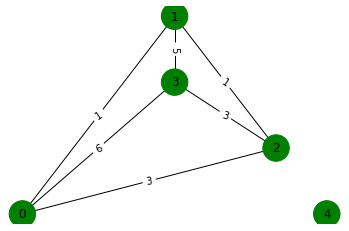


Initial table of vertices and their distances from the source: 


vertex,distance/cost
0,0.000000
1,inf
2,inf
3,inf
4,inf


--------------------------------------------------

Visiting vertex: 0


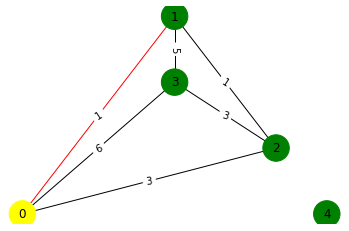

Smaller distance found, table updated!


vertex,distance/cost
0,0.000000
1,1.000000
2,inf
3,inf
4,inf


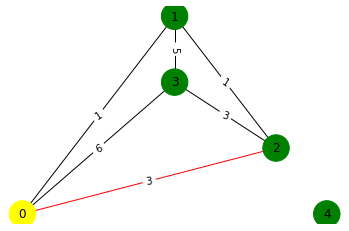

Smaller distance found, table updated!


vertex,distance/cost
0,0.000000
1,1.000000
2,3.000000
3,inf
4,inf


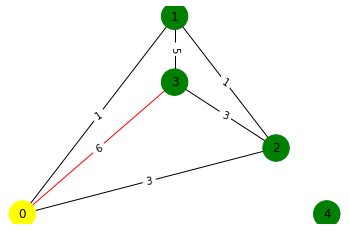

Smaller distance found, table updated!


vertex,distance/cost
0,0.000000
1,1.000000
2,3.000000
3,6.000000
4,inf




--------------------------------------------------

Visiting vertex: 1


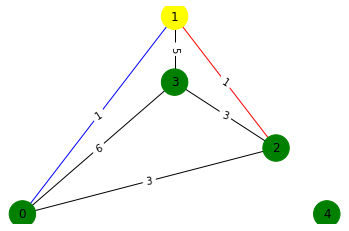

Smaller distance found, table updated!


vertex,distance/cost
0,0.000000
1,1.000000
2,2.000000
3,6.000000
4,inf




--------------------------------------------------

Visiting vertex: 2


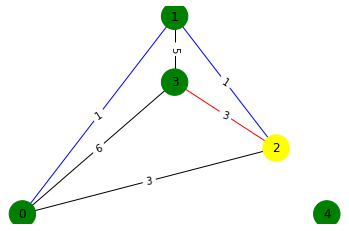

Smaller distance found, table updated!


vertex,distance/cost
0,0.000000
1,1.000000
2,2.000000
3,5.000000
4,inf




--------------------------------------------------

Visiting vertex: 3
No smaller distances found.
--------------------------------------------------

Shortest paths to each vertex from vertex: 0


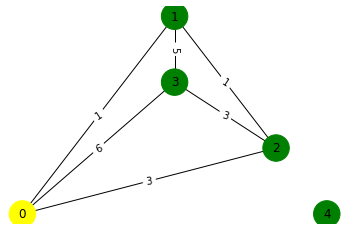

Shortest path to vertex 0 is 0 with a total cost of 0
--------------------------------------------------




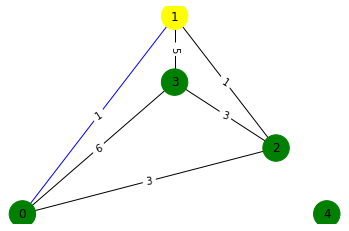

Shortest path to vertex 1 is 0 -> 1 with a total cost of 1
--------------------------------------------------




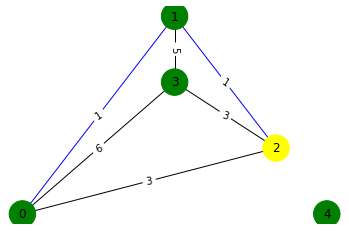

Shortest path to vertex 2 is 0 -> 1 -> 2 with a total cost of 2
--------------------------------------------------




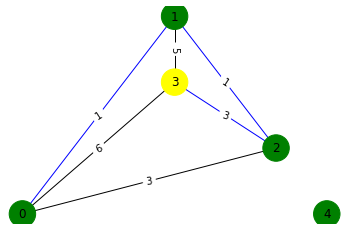

Shortest path to vertex 3 is 0 -> 1 -> 2 -> 3 with a total cost of 5
--------------------------------------------------




In [5]:
exampleGraph = Graph()
exampleGraph.addEdge(0, 1, 1)
exampleGraph.addEdge(0, 2, 3)
exampleGraph.addEdge(1, 2, 1)
exampleGraph.addEdge(1, 3, 5)
exampleGraph.addEdge(2, 3, 3)
exampleGraph.addEdge(3, 0, 6)
exampleGraph.addEdge(3, 1, 5)
exampleGraph.addNode(4)

exampleGraph.printDijkstra(0)

## Example 2 - Directional Graph

This example takes the graph of Example 1.) and replaces its edges with directional ones to show how Dijkstra's Algorithm works over Directional Weighted Graphs. Again the starting vertex for this example is 0, however few distinct changes can be seen with how the algorithm progresses.

The steps involved with the algorithm are again shown below:

Begin Dijkstra's Algorithm over the following graph with 5 vertices at source vertex: 0


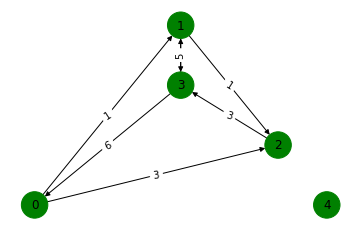


Initial table of vertices and their distances from the source: 


vertex,distance/cost
0,0.000000
1,inf
2,inf
3,inf
4,inf


--------------------------------------------------

Visiting vertex: 0


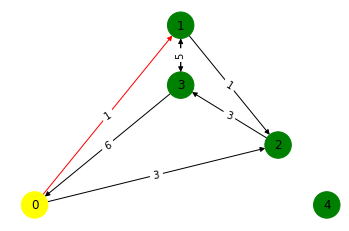

Smaller distance found, table updated!


vertex,distance/cost
0,0.000000
1,1.000000
2,inf
3,inf
4,inf


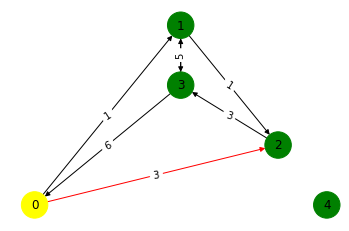

Smaller distance found, table updated!


vertex,distance/cost
0,0.000000
1,1.000000
2,3.000000
3,inf
4,inf




--------------------------------------------------

Visiting vertex: 1


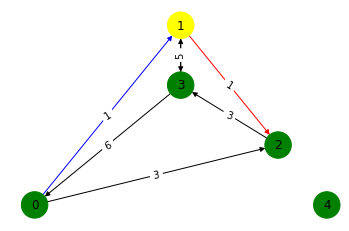

Smaller distance found, table updated!


vertex,distance/cost
0,0.000000
1,1.000000
2,2.000000
3,inf
4,inf


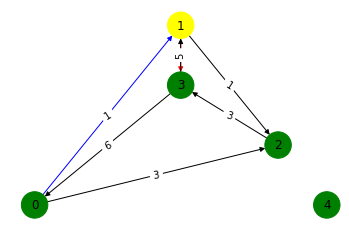

Smaller distance found, table updated!


vertex,distance/cost
0,0.000000
1,1.000000
2,2.000000
3,6.000000
4,inf




--------------------------------------------------

Visiting vertex: 2


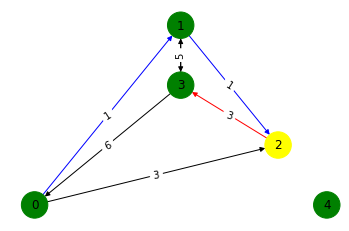

Smaller distance found, table updated!


vertex,distance/cost
0,0.000000
1,1.000000
2,2.000000
3,5.000000
4,inf




--------------------------------------------------

Visiting vertex: 3
No smaller distances found.
--------------------------------------------------

Shortest paths to each vertex from vertex: 0


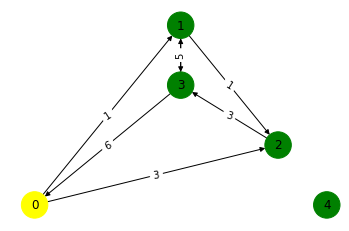

Shortest path to vertex 0 is 0 with a total cost of 0
--------------------------------------------------




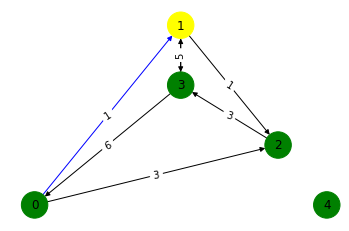

Shortest path to vertex 1 is 0 -> 1 with a total cost of 1
--------------------------------------------------




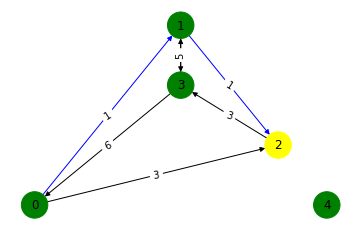

Shortest path to vertex 2 is 0 -> 1 -> 2 with a total cost of 2
--------------------------------------------------




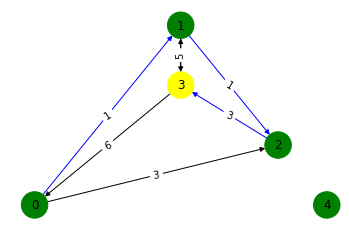

Shortest path to vertex 3 is 0 -> 1 -> 2 -> 3 with a total cost of 5
--------------------------------------------------




In [6]:
exampleDiGraph = GraphDi(4)
exampleDiGraph.addEdge(0, 1, 1)
exampleDiGraph.addEdge(0, 2, 3)
exampleDiGraph.addEdge(1, 2, 1)
exampleDiGraph.addEdge(1, 3, 5)
exampleDiGraph.addEdge(2, 3, 3)
exampleDiGraph.addEdge(3, 0, 6)
exampleDiGraph.addEdge(3, 1, 5)
exampleDiGraph.addNode(4)

exampleDiGraph.printDijkstra(0)

## User Input for Non-Directional Graphs

**NOTE:** Before attempting to run this code cell with user generated graphs, please make sure you have the **required** packages listed at the beginning of the notebook installed.

Below is the code cell for importing custom non-directional graphs into the codebase and seeing a visualization of Dijkstra's algorithm run on them. An example graph with its Dijkstra's algorithm visualization is provided to you. To use this code cell, make sure that the adjacency list representation of your graph is formatted correctly and placed in a text file in the same directory as this notebook. 

To set up the custom graph, simply replace the 'example.txt' string in the `Graph.readjlist('example.txt')` below with the name of your file. 

Currently the algorithm is set to run with 0 as the starting vertex. To change this, replace the 0 in the `testGraph.printDijkstra(0)` line with the starting vertex of your choice. 

Afterwards when you are ready to run the algorithm, hit shift + enter on the code cell.

Begin Dijkstra's Algorithm over the following graph with 7 vertices at source vertex: 0


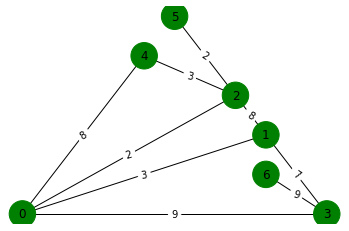


Initial table of vertices and their distances from the source: 


vertex,distance/cost
0,0.000000
1,inf
2,inf
3,inf
4,inf
5,inf
6,inf


--------------------------------------------------

Visiting vertex: 0


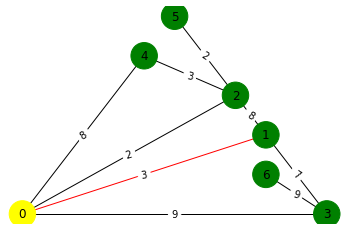

Smaller distance found, table updated!


vertex,distance/cost
0,0.000000
1,3.000000
2,inf
3,inf
4,inf
5,inf
6,inf


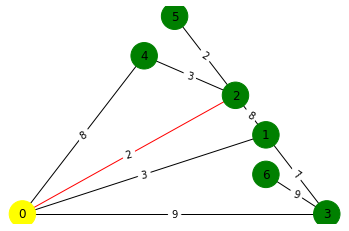

Smaller distance found, table updated!


vertex,distance/cost
0,0.000000
1,3.000000
2,2.000000
3,inf
4,inf
5,inf
6,inf


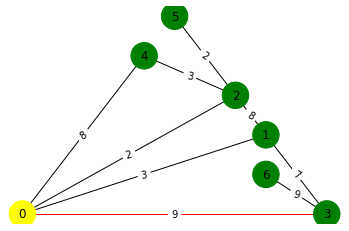

Smaller distance found, table updated!


vertex,distance/cost
0,0.000000
1,3.000000
2,2.000000
3,9.000000
4,inf
5,inf
6,inf


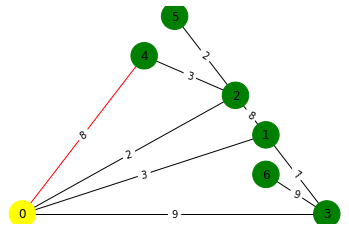

Smaller distance found, table updated!


vertex,distance/cost
0,0.000000
1,3.000000
2,2.000000
3,9.000000
4,8.000000
5,inf
6,inf




--------------------------------------------------

Visiting vertex: 2


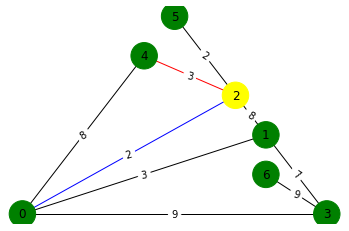

Smaller distance found, table updated!


vertex,distance/cost
0,0.000000
1,3.000000
2,2.000000
3,9.000000
4,5.000000
5,inf
6,inf


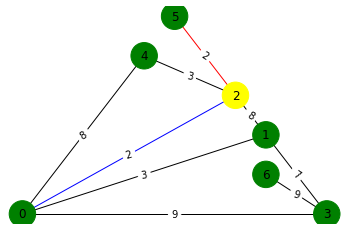

Smaller distance found, table updated!


vertex,distance/cost
0,0.000000
1,3.000000
2,2.000000
3,9.000000
4,5.000000
5,4.000000
6,inf




--------------------------------------------------

Visiting vertex: 1
No smaller distances found.
--------------------------------------------------

Visiting vertex: 5
No smaller distances found.
--------------------------------------------------

Visiting vertex: 4
No smaller distances found.
--------------------------------------------------

Visiting vertex: 3


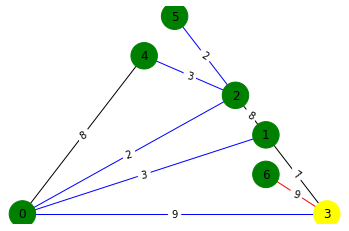

Smaller distance found, table updated!


vertex,distance/cost
0,0.000000
1,3.000000
2,2.000000
3,9.000000
4,5.000000
5,4.000000
6,18.000000




--------------------------------------------------

Visiting vertex: 6
No smaller distances found.
--------------------------------------------------

Shortest paths to each vertex from vertex: 0


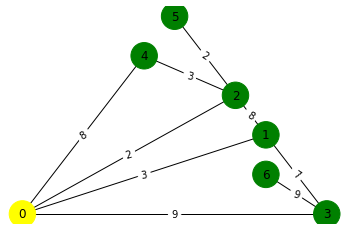

Shortest path to vertex 0 is 0 with a total cost of 0
--------------------------------------------------




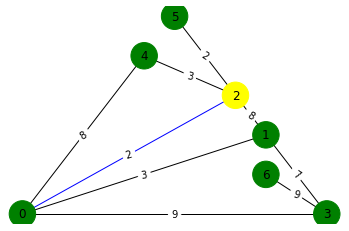

Shortest path to vertex 2 is 0 -> 2 with a total cost of 2
--------------------------------------------------




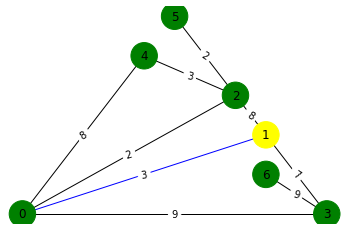

Shortest path to vertex 1 is 0 -> 1 with a total cost of 3
--------------------------------------------------




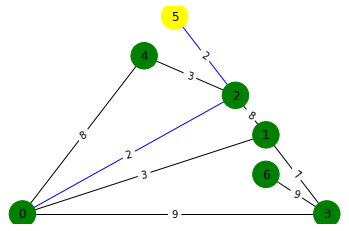

Shortest path to vertex 5 is 0 -> 2 -> 5 with a total cost of 4
--------------------------------------------------




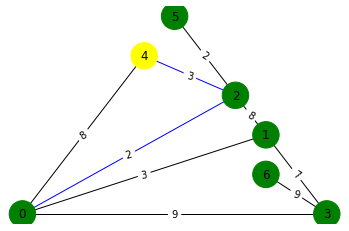

Shortest path to vertex 4 is 0 -> 2 -> 4 with a total cost of 5
--------------------------------------------------




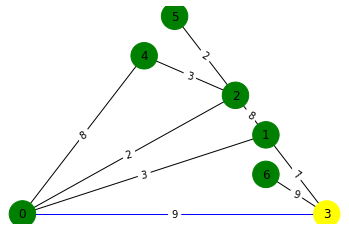

Shortest path to vertex 3 is 0 -> 3 with a total cost of 9
--------------------------------------------------




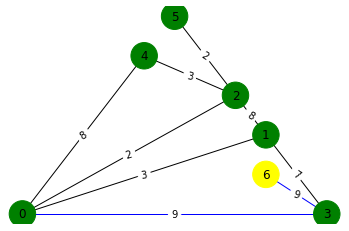

Shortest path to vertex 6 is 0 -> 3 -> 6 with a total cost of 18
--------------------------------------------------




In [7]:
testGraph = Graph.readadjlist('example.txt')

testGraph.printDijkstra(0)

## User Input for Directional Graphs

**NOTE:** Before attempting to run this code cell with user generated graphs, please make sure you have the **required** packages listed at the beginning of the notebook installed.

Below is the code cell for importing custom directional graphs into the codebase and seeing a visualization of Dijkstra's algorithm run on them. An example graph with its Dijkstra's algorithm visualization is provided to you. To use this code cell, make sure that the adjacency list representation of your graph is formatted correctly and placed in a text file in the same directory as this notebook. 

To set up the custom graph, simply replace the 'example.txt' string in the `GraphDi.readjlist('exampleDi.txt')` below with the name of your file. 

Currently the algorithm is set to run with 0 as the starting vertex. To change this, replace the 6 in the `testDiGraph.printDijkstra(6)` line with the starting vertex of your choice. 

Afterwards when you are ready to run the algorithm, hit shift + enter on the code cell.

Begin Dijkstra's Algorithm over the following graph with 8 vertices at source vertex: 6


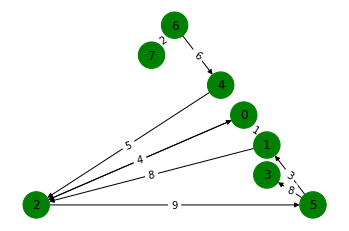


Initial table of vertices and their distances from the source: 


vertex,distance/cost
0,inf
1,inf
2,inf
3,inf
4,inf
5,inf
6,0.000000
7,inf


--------------------------------------------------

Visiting vertex: 6


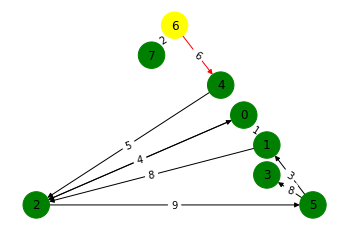

Smaller distance found, table updated!


vertex,distance/cost
0,inf
1,inf
2,inf
3,inf
4,6.000000
5,inf
6,0.000000
7,inf


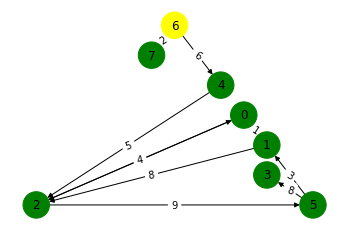

Smaller distance found, table updated!


vertex,distance/cost
0,inf
1,inf
2,inf
3,inf
4,6.000000
5,inf
6,0.000000
7,2.000000




--------------------------------------------------

Visiting vertex: 7
No smaller distances found.
--------------------------------------------------

Visiting vertex: 4


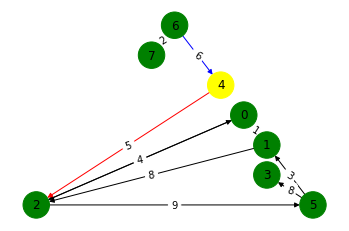

Smaller distance found, table updated!


vertex,distance/cost
0,inf
1,inf
2,11.000000
3,inf
4,6.000000
5,inf
6,0.000000
7,2.000000




--------------------------------------------------

Visiting vertex: 2


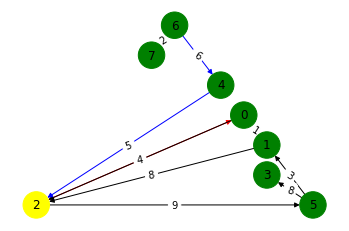

Smaller distance found, table updated!


vertex,distance/cost
0,15.000000
1,inf
2,11.000000
3,inf
4,6.000000
5,inf
6,0.000000
7,2.000000


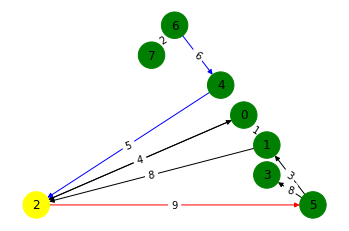

Smaller distance found, table updated!


vertex,distance/cost
0,15.000000
1,inf
2,11.000000
3,inf
4,6.000000
5,20.000000
6,0.000000
7,2.000000




--------------------------------------------------

Visiting vertex: 0
No smaller distances found.
--------------------------------------------------

Visiting vertex: 5


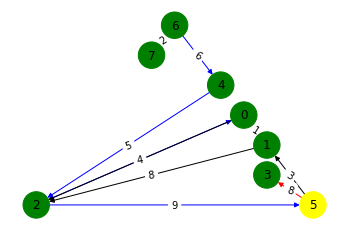

Smaller distance found, table updated!


vertex,distance/cost
0,15.000000
1,inf
2,11.000000
3,28.000000
4,6.000000
5,20.000000
6,0.000000
7,2.000000


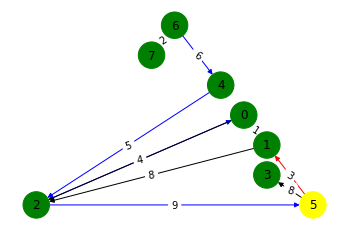

Smaller distance found, table updated!


vertex,distance/cost
0,15.000000
1,23.000000
2,11.000000
3,28.000000
4,6.000000
5,20.000000
6,0.000000
7,2.000000




--------------------------------------------------

Visiting vertex: 1
No smaller distances found.
--------------------------------------------------

Visiting vertex: 3
No smaller distances found.
--------------------------------------------------

Shortest paths to each vertex from vertex: 6


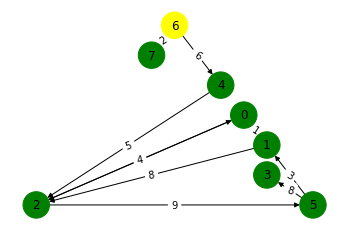

Shortest path to vertex 6 is 6 with a total cost of 0
--------------------------------------------------




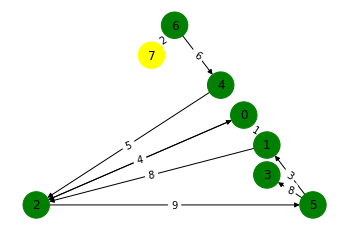

Shortest path to vertex 7 is 6 -> 7 with a total cost of 2
--------------------------------------------------




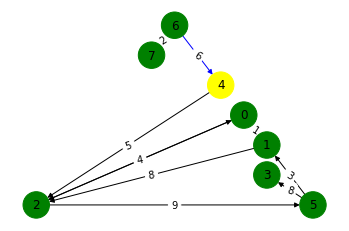

Shortest path to vertex 4 is 6 -> 4 with a total cost of 6
--------------------------------------------------




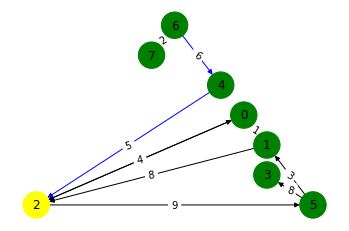

Shortest path to vertex 2 is 6 -> 4 -> 2 with a total cost of 11
--------------------------------------------------




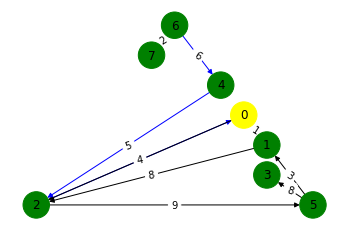

Shortest path to vertex 0 is 6 -> 4 -> 2 -> 0 with a total cost of 15
--------------------------------------------------




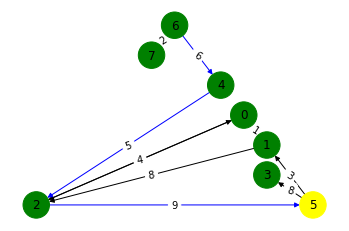

Shortest path to vertex 5 is 6 -> 4 -> 2 -> 5 with a total cost of 20
--------------------------------------------------




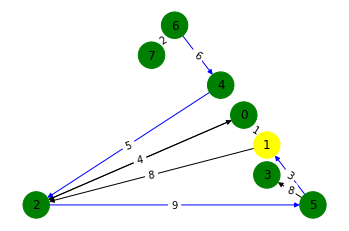

Shortest path to vertex 1 is 6 -> 4 -> 2 -> 5 -> 1 with a total cost of 23
--------------------------------------------------




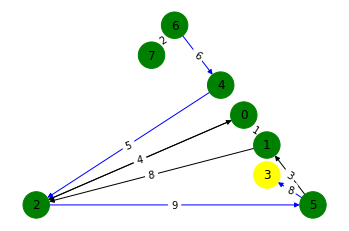

Shortest path to vertex 3 is 6 -> 4 -> 2 -> 5 -> 3 with a total cost of 28
--------------------------------------------------




In [8]:
testDiGraph = GraphDi.readadjlist('exampleDi.txt')

testDiGraph.printDijkstra(6)